# Assignment 3
### Instructor: Vagelis Papalexakis
### Credit for  Assignment 3: 10/35 points of the final grade

In this assignment we will implement the K-means clustering algorithm. We are going to use the same dataset as in the previous two assignments (<b>Note</b>: make sure you copy the dataset from Assignment 1 to the folder of this assignment!).

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split


data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)




## Question 1: Implementing and testing K-means clustering [100%]
### Question 1a: Implementing K-Means clustering [50%]
In this question you should implement a function that performs k-means clustering, using the Euclidean distance (you may use Numpy libraries for the distance computation). For calculation of the centroid you should use the 'mean' function.

For uniformity, you should implement a function with the following specifications:
```python
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
```
where 1) 'all_vals' is the $N \times M$ matrix that contains all data points ($N$ is the number of data points and $M$ is the number of features, each row of the matrix is a data point), 2) 'K' is the number of clusters, 3) 'max_iter' is the maxium number of iterations, and 4) 'tol' is the tolerance for the change of the sum of squares of errors that determines convergence.

Your function should return the following variables: 1) 'assignments': this is a $N\times 1$ vector (where $N$ is the number of data points) where the $i$-th position of that vector contains the cluster number that the $i$-th data point is assigned to, 2) 'centroids': this is a $K\times M$ matrix, each row of which contains the centroid for every cluster, 3) 'all_sse': this is a vector that contains all the sum of squares of errors per iteration of the algorithm, and 4) 'iters': this is the number of iterations that the algorithm ran.

Here we are going to implement the simplest version of K-means, where the initial centroids are chosen entirely at random among all the data points.

As we saw in class, the K-means algorithm iterates over the following steps:
- Given a set of centroids, assign all data points to the cluster represented by its nearest centroid (according to Euclidean distance)
- Given a set of assignments of points to clusters, compute the new centroids for every cluster, by taking the mean of all the points assigned to each cluster.

Your algorithm should converge if 1) the maximum number of iteratiosn is reached, or 2) if the SSE between two consecutive iterations does not change a lot (as in the gradient descent for linear regression we saw in Assignment 2). In order to check for the latter condition, you may use the following piece of code:
```python
if np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] <= tol
```

In order to calculate the SSE (sum of squares of error) first you need to define what an 'error' is. In k-means, error per data point refers to the Euclidean distance of that particular point from its assigned centroid. SSE sums up all those squared Euclidean distances for all data points and comes up with a number that reflects the total error of approximating every data points by its assigned centroid.




In [227]:
#all_vals=data.values()
all_vals = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels
global data_ndarray
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import numpy as np
import copy
import random
import math
global newCent
#kmeans_clustering(all_vals,k=3,max_iter = 100, tol = pow(10,-3) )
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', names = data_names)

def dist(a, b):
    return np.linalg.norm(a - b)
centroids={}
def some(x, n):
    return x.iloc[random.sample(x.index, n)]

#k-means clustering
def kmeans_clustering(data,k,max_iter = 100, tol = pow(10,-3)):

    sse = []
    max_iter=100
    iterations = 0
    centroids = {
        i+1: all_vals[random.randint(1,149)]
        for i in range(k)
        }
    c=[ v.tolist() for v in centroids.values() ]
    data_ndarray = data.iloc[:,0:4].values.tolist()
    flag=0
    
    while(iterations<max_iter):
        if(flag==1):
            break
        
        d=0
        dist_toeach_c=[]
        dist=[]
        for l in c:
            dist=[]
            for m in data_ndarray:
                d=0
                for x in range(0,len(m)):
                    d+=(l[x]-m[x])**2
                    d_sqrt=np.sqrt(d)

                dist.append(d_sqrt)

            dist_toeach_c.append(dist)

        distto_c=[]
        mindist = float('inf')
        res = []
        res_l = []
        distarr = []
        indices=[]
        for j in range(len(dist_toeach_c[0])):
            minInd = 0
            minDist = float('inf')
            for i in range(len(dist_toeach_c)):
                if minDist > dist_toeach_c[i][j]:
                    minDist = dist_toeach_c[i][j]
                    minInd = i
            distarr.append(minDist)
            res.append(centroids[minInd+1])
            res_l.append(('c'+str(minInd+1),j))

        res_l.sort(key= lambda x:x[1])
        assignments=[]
        assignments=[x for xs in res_l for x in xs]
        
        print('\n Assignments \n',assignments[::2])

        cenMean = {}
        for cent in res_l:
            if cent[0] in cenMean:
                cenMean[cent[0]].append(data_ndarray[cent[1]])
            else:
                cenMean[cent[0]] = [data_ndarray[cent[1]]]
        newCent = []        
        for i in cenMean:
            l = cenMean[i]
            l1 = l2 = l3 = l4 = 0
            r = len(l)
            for j in l:
                l1+= j[0]
                l2+= j[1]
                l3+= j[2]
                l4+= j[3]
            newCent.append([round(l1/r,2),round(l2/r,2),round(l3/r,2),round(l4/r,2)])
        error = []

        for i,j in zip(newCent,c):
            error.append(math.sqrt((i[0] - j[0])**2 + (i[1]-j[1])**2+ (i[2]-j[2])**2+ (i[3]-j[3])**2))
        currsse = np.absolute(sum(error) - sse[iterations-1])/sse[iterations-1] if iterations>0 else sum(error)
        if np.isnan(currsse):
            currsse=0

        if (iterations>0 and currsse <=tol ):
            print("\nNumber of iterations: ",iterations)
            flag=1
            break

        sse.append(round(sum(error),3))


            
            


        c = copy.deepcopy(newCent)

        print('\n----------------iterations------------------\t',iterations+1)
        iterations+=1
    print('all_sse\n',sse)
    print('\n Final New Centroid\n',newCent)
    
    
    
    
    
    
    
    
    return sse
    

    

       

    
kmeans_clustering(data,3,max_iter = 100, tol = pow(10,-3) )
 
    #.PLEASE IGNORE THE WARNINGS IN THE OUTPUT. 
        
    


 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c1', 'c3', 'c2', 'c3', 'c1', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c1', 'c1', 'c3', 'c2', 'c2', 'c1', 'c1', 'c3', 'c3', 'c2', 'c3', 'c2', 'c3', 'c1', 'c3', 'c3', 'c1', 'c1', 'c2', 'c3', 'c3', 'c3', 'c2', 'c1', 'c2', 'c3', 'c1', 'c1', 'c1', 'c3', 'c3', 'c1', 'c2', 'c3', 'c3', 'c1', 'c2', 'c1', 'c1', 'c2']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1',

/home/vishal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in double_scalars


[3.194, 5.751, 3.702, 0.056, 0.0]

### Question 1b: Visualizing K-means [10%]
In this question we wll visualize the result of the K-means algorithm. For ease of visualization, we will focus on a scatterplot of two of the four features of the Iris dataset. In particular: run your K-means code with K=3 and default values for the rest of the inputs. Subsequently, make a single scatterplot that contains all data points of the dataset for features 'sepal_length' and 'petal_length' and color every data point according to its cluster assignment.

/home/vishal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in double_scalars


[2.282, 1.32, 0.139, 0.071, 0.126, 0.06, 0.051, 0.044, 0.0]

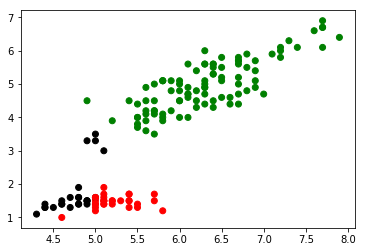

In [229]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import numpy as np
import copy
import random
import math
global newCent
#kmeans_clustering(all_vals,k=3,max_iter = 100, tol = pow(10,-3) )
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', names = data_names)

def dist(a, b):
    return np.linalg.norm(a - b)
centroids={}
def some(x, n):
    return x.iloc[random.sample(x.index, n)]

#k-means clustering
def kmeans_clustering_1(data,k,max_iter = 100, tol = pow(10,-3)):

    sse = []
    max_iter=100
    iterations = 0
    centroids = {
        i+1: all_vals[random.randint(1,149)]
        for i in range(k)
        }
    c=[ v.tolist() for v in centroids.values() ]
    data_ndarray = data.iloc[:,0:4].values.tolist()
    flag=0
    
    while(iterations<max_iter):
        if(flag==1):
            break
        
        d=0
        dist_toeach_c=[]
        dist=[]
        for l in c:
            dist=[]
            for m in data_ndarray:
                d=0
                for x in range(0,len(m)):
                    d+=(l[x]-m[x])**2
                    d_sqrt=np.sqrt(d)

                dist.append(d_sqrt)

            dist_toeach_c.append(dist)

        distto_c=[]
        mindist = float('inf')
        res = []
        res_l = []
        distarr = []
        indices=[]
        for j in range(len(dist_toeach_c[0])):
            minInd = 0
            minDist = float('inf')
            for i in range(len(dist_toeach_c)):
                if minDist > dist_toeach_c[i][j]:
                    minDist = dist_toeach_c[i][j]
                    minInd = i
            distarr.append(minDist)
            res.append(centroids[minInd+1])
            res_l.append(('c'+str(minInd+1),j))

        res_l.sort(key= lambda x:x[1])
        assignments=[]
        assignments=[x for xs in res_l for x in xs]
        


        cenMean = {}
        for cent in res_l:
            if cent[0] in cenMean:
                cenMean[cent[0]].append(data_ndarray[cent[1]])
            else:
                cenMean[cent[0]] = [data_ndarray[cent[1]]]
        newCent = []        
        for i in cenMean:
            l = cenMean[i]
            l1 = l2 = l3 = l4 = 0
            r = len(l)
            for j in l:
                l1+= j[0]
                l2+= j[1]
                l3+= j[2]
                l4+= j[3]
            newCent.append([round(l1/r,2),round(l2/r,2),round(l3/r,2),round(l4/r,2)])
        error = []

        for i,j in zip(newCent,c):
            error.append(math.sqrt((i[0] - j[0])**2 + (i[1]-j[1])**2+ (i[2]-j[2])**2+ (i[3]-j[3])**2))
        currsse = np.absolute(sum(error) - sse[iterations-1])/sse[iterations-1] if iterations>0 else sum(error)
        if np.isnan(currsse):
            currsse=0

        if (iterations>0 and currsse <=tol ):
            
            flag=1
            break

        sse.append(round(sum(error),3))

    

            
            


        c = copy.deepcopy(newCent)

        
        iterations+=1


    dict={'c1':newCent[0],
    'c2':newCent[1],
    'c3':newCent[2]}
    df=pd.DataFrame(data)
    centroid_list=[]
    df['cluster']=assignments[::2]
    for x in assignments[::2]:
        centroid_list.append(dict[x])
    df['centroid']=centroid_list
    LABEL_COLOR_MAP = {'c1' : 'r',
                   'c2' : 'k',
                   'c3':'g'
                   }
    x=df['sepal_length'].values
    y=df['petal_length'].values
    label_color = [LABEL_COLOR_MAP[l] for l in assignments[::2]]
    plt.scatter(x,y , c=label_color)
    
    
    
    
    
    
    
    return sse
    

    

       

    
kmeans_clustering_1(data,3,max_iter = 100, tol = pow(10,-3) )

### Question 1c: Testing K-means [40%]
Selecting the right number of clusters $K$ is a very challenging problem, especially when we don't have some side-information or domain expertise that can help us narrow down a few reasonable values for that parameter. 

In the absence of any other information, a very useful exercise is to create the plot of SSE (sum of squares of errors) as a function of $K$. Ideally, for a very small $K$, the error will be high (since we are trying to approximate a whole lot of points with a very small number of centroids) and as $K$ increases, the error decreases. However, after a certain value (or a couple of values) for $K$, we will notice diminishing returns, i.e., the error will be decreasing, but not to a great degree. Typically, the value(s) for $K$ where this behavior is observed (the threshold point after which we observe diminishing returns) is usually a good guess for the number of clusters. 

In this question, we will have to create the SSE vs. K plot for $K = 1\cdots10$. Furthermore, because K-means uses randomized initialization, we need to do a number of iterations per value of $K$ in order to get a good estimate of the actual SSE (which may not be caused by randomness in the initialization). For this question, you will have to run the entire K-means algorithm to completion, and repeat it 50 different times per $K$, and collect all SSEs. In the figure, you should report the mean SSE per $K$, surrounded by error-bars which will encode the standard deviation.


 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1',

/home/vishal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in double_scalars



 Assignments 
 ['c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1',

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2']

----------------iterations--------


 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1',

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c2', 'c3', 'c2', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c3']

----------------iterations------------------	 2

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c2', 'c3', 'c2', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c3']

Number of iterations:  11
all_sse
 [8.783, 0.184, 0.12, 0.141, 0.142, 0.113, 0.145, 0.112, 0.123,


 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c2', 'c3', 'c2', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c3']

Number of iterations:  11
all_sse
 [6.424, 0.362, 0.143, 0.147, 0.175, 0.144, 0.14


 Assignments 
 ['c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c1', 'c2', 'c1', 'c3', 'c2', 'c3', 'c1', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c2', 'c3', 'c3', 'c2', 'c3', 'c1', 'c3', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c3', 'c3', 'c3', 'c3', 'c1', 'c3', 'c2', 'c1', 'c2', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1',


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c3', 'c1', 'c3', 'c3', 'c2', 'c2', 'c1', 'c3', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c3', 'c3', 'c2', 'c3', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c3', 'c3', 'c2', 'c2', 'c3', 'c3', 'c2', 'c1', 'c2', 'c1', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4']

----------------iterations------------------	 2

 Assignments 
 ['c1', 'c2', 'c2',


 Assignments 
 ['c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c1', 'c2', 'c1', 'c3', 'c2', 'c2', 'c2', 'c3', 'c1', 'c3', 'c3', 'c2', 'c3', 'c2', 'c3', 'c1', 'c2', 'c3', 'c2', 'c3', 'c4', 'c3', 'c4', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c3', 'c3', 'c3', 'c3', 'c4', 'c2', 'c2', 'c1', 'c2', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c4', 'c4', 'c1', 'c4', 'c4', 'c1', 'c3', 'c1', 'c1', 'c1', 'c4', 'c4', 'c1', 'c4', 'c4', 'c4', 'c4', 'c1', 'c1', 'c4', 'c1', 'c4', 'c1', 'c4', 'c1', 'c1', 'c4', 'c4', 'c4', 'c1', 'c1', 'c1', 'c4', 'c4', 'c4', 'c1', 'c4', 'c4', 'c4', 'c1', 'c4', 'c1', 'c4', 'c1', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1',

 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c3', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c3', 'c3', 'c3', 'c3', 'c4', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c4', 'c3', 'c3', 'c3', 'c3', 'c3', 'c4', 'c3', 'c4', 'c3', 'c3', 'c3', 'c3', 'c4', 'c4', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c4', 'c3', 'c3', 'c3', 'c4', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3']

----------------iterations------------------	 11

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', '

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c4', 'c1', 'c1', 'c1', 'c1', 'c3', 'c1', 'c1', 'c1', 'c3', 'c4', 'c3', 'c1', 'c3', 'c4', 'c3', 'c4', 'c1', 'c1', 'c4', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c4', 'c4', 'c1', 'c1', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c4', 'c1', 'c4', 'c1', 'c4', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2']

----------------iterations------------------	 1

 Assignments 
 ['c3', 'c1', 'c1', 'c1', 'c2', 'c

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c3', 'c2', 'c3', 'c2', 'c3', 'c2', 'c2', 'c3', 'c2', 'c3', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c4', 'c2', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c2', 'c2', 'c4', 'c2', 'c2', 'c4', 'c4', 'c4', 'c4', 'c2', 'c4', 'c2', 'c4', 'c2', 'c4', 'c4', 'c2', 'c2', 'c4', 'c4', 'c4', 'c4', 'c4', 'c2', 'c2', 'c4', 'c4', 'c4', 'c2', 'c4', 'c4', 'c4', 'c2', 'c4', 'c4', 'c4', 'c2', 'c2', 'c4', 'c2']

----------------iterations------------------	 8

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c

all_sse
 [8.813, 0.519, 0.264, 0.183, 0.175, 0.144, 0.145, 0.112, 0.123, 0.049, 0.0]

 Final New Centroid
 [[4.82, 3.22, 1.44, 0.23], [5.37, 3.8, 1.52, 0.28], [6.85, 3.08, 5.72, 2.05], [5.88, 2.74, 4.39, 1.43]]

 Assignments 
 ['c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c1', 'c1', 'c1', 'c3', 'c1', 'c2', 'c1', 'c3', 'c1', 'c3', 'c3', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c3', 'c2', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c3', 'c3', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c3', 'c3', 'c1', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1'

 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c3', 'c3', 'c3', 'c4', 'c3', 'c4', 'c3', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c3', 'c3', 'c4', 'c3', 'c3', 'c3', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c3', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c5', 'c3', 'c5', 'c3', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c3', 'c3', 'c5', 'c3', 'c3', 'c3', 'c3', 'c5', 'c5', 'c3', 'c5', 'c3', 'c5', 'c3', 'c5', 'c5', 'c3', 'c3', 'c3', 'c5', 'c5', 'c5', 'c3', 'c3', 'c3', 'c5', 'c3', 'c3', 'c3', 'c5', 'c5', 'c3', 'c3', 'c5', 'c5', 'c3', 'c3', 'c3', 'c3', 'c3']

----------------iterations------------------	 5

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c


Number of iterations:  5
all_sse
 [11.311, 4.057, 2.302, 6.339, 0.0]

 Final New Centroid
 [[5.01, 3.42, 1.46, 0.24], [6.25, 2.87, 4.84, 1.64], [5.68, 2.71, 4.15, 1.3], [5.24, 2.37, 3.44, 1.03], [6.91, 3.1, 5.85, 2.13]]

 Assignments 
 ['c3', 'c3', 'c3', 'c3', 'c3', 'c5', 'c3', 'c3', 'c3', 'c3', 'c5', 'c3', 'c3', 'c3', 'c5', 'c5', 'c5', 'c3', 'c5', 'c5', 'c3', 'c5', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c5', 'c5', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c5', 'c5', 'c3', 'c5', 'c3', 'c5', 'c3', 'c1', 'c1', 'c1', 'c4', 'c1', 'c4', 'c1', 'c4', 'c1', 'c4', 'c4', 'c4', 'c4', 'c1', 'c4', 'c1', 'c4', 'c4', 'c1', 'c4', 'c4', 'c4', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c4', 'c4', 'c4', 'c4', 'c4', 'c1', 'c4', 'c4', 'c1', 'c1', 'c4', 'c4', 'c4', 'c1', 'c4', 'c4', 'c4', 'c4', 'c4', 'c1', 'c4', 'c4', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c4', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c4', 'c2', 'c2', 'c2', 'c2', 'c2', 'c4', 'c2', 'c4', 'c2', 'c1', 'c2', 'c2', 'c1', 

 ['c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c3', 'c4', 'c3', 'c5', 'c3', 'c5', 'c4', 'c5', 'c3', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c3', 'c5', 'c5', 'c3', 'c5', 'c4', 'c5', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c4', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c4', 'c4', 'c3', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c1', 'c4', 'c1', 'c2', 'c1', 'c1', 'c5', 'c1', 'c2', 'c1', 'c4', 'c2', 'c2', 'c4', 'c4', 'c2', 'c2', 'c1', 'c1', 'c3', 'c1', 'c4', 'c1', 'c4', 'c1', 'c1', 'c4', 'c4', 'c2', 'c2', 'c2', 'c1', 'c2', 'c3', 'c2', 'c1', 'c1', 'c2', 'c4', 'c2', 'c1', 'c2', 'c4', 'c1', 'c1', 'c2', 'c2', 'c2', 'c1', 'c4']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c

 ['c4', 'c1', 'c1', 'c1', 'c4', 'c4', 'c1', 'c4', 'c5', 'c1', 'c4', 'c1', 'c1', 'c5', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c1', 'c1', 'c1', 'c4', 'c4', 'c4', 'c1', 'c1', 'c4', 'c4', 'c4', 'c1', 'c4', 'c4', 'c1', 'c5', 'c4', 'c4', 'c5', 'c5', 'c4', 'c4', 'c1', 'c4', 'c1', 'c4', 'c4', 'c3', 'c3', 'c3', 'c2', 'c3', 'c2', 'c3', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c2', 'c2', 'c3', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c


 Final New Centroid
 [[5.26, 3.67, 1.5, 0.29], [4.71, 3.12, 1.42, 0.19], [6.24, 2.86, 4.81, 1.62], [5.53, 2.62, 3.94, 1.22], [6.91, 3.1, 5.85, 2.13]]

 Assignments 
 ['c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c4', 'c4', 'c1', 'c5', 'c4', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c4', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c4', 'c5', 'c3', 'c4', 'c1', 'c4', 'c4', 'c4', 'c4', 'c1', 'c4', 'c5', 'c5', 'c5', 'c5', 'c3', 'c5', 'c4', 'c4', 'c4', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c1', 'c3', 'c1', 'c1', 'c1', 'c1', 'c5', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c1', 'c1', 'c1', 'c1', 'c3', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3'


 Assignments 
 ['c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c2', 'c5', 'c1', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c1', 'c2', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c2', 'c2', 'c4', 'c1', 'c1', 'c4', 'c2', 'c4', 'c1', 'c4', 'c2', 'c1', 'c4', 'c2', 'c2', 'c2', 'c1', 'c4', 'c4', 'c1', 'c4', 'c2', 'c4', 'c2', 'c4', 'c4', 'c2', 'c2', 'c1', 'c4', 'c4', 'c4', 'c2', 'c1', 'c1', 'c4', 'c2', 'c1', 'c2', 'c4', 'c2', 'c2', 'c2', 'c4', 'c4', 'c2', 'c2', 'c2', 'c2', 'c2']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1',

 [14.843, 2.435, 6.169, 0.271, 0.037, 0.0]

 Final New Centroid
 [[4.82, 3.22, 1.44, 0.23], [5.37, 3.8, 1.52, 0.28], [6.25, 2.85, 4.81, 1.62], [5.63, 2.72, 4.13, 1.3], [5.24, 2.37, 3.44, 1.03], [6.91, 3.1, 5.85, 2.13]]

 Assignments 
 ['c3', 'c3', 'c3', 'c3', 'c3', 'c5', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c5', 'c5', 'c3', 'c5', 'c5', 'c3', 'c5', 'c3', 'c5', 'c5', 'c3', 'c5', 'c3', 'c3', 'c3', 'c3', 'c5', 'c5', 'c5', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c5', 'c5', 'c3', 'c5', 'c3', 'c3', 'c3', 'c1', 'c6', 'c1', 'c6', 'c6', 'c6', 'c2', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c2', 'c6', 'c6', 'c6', 'c6', 'c6', 'c4', 'c2', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c2', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c2', 'c2', 'c4', 'c2', 'c4', 'c1', 'c6', 'c1', 'c4', 'c4', 'c2', 'c2', 'c4', 'c6', 'c2', 'c2', 'c2', 'c1', 'c4', 'c6', 'c4', 'c6', 'c1', 'c2', 'c4', 'c1', 'c2', 'c

----------------iterations------------------	 3

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c2', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c2', 'c4', 'c3', 'c2', 'c3', 'c4', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3', 'c3', 'c4', 'c3', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c5', 'c4', 'c6', 'c5', 'c5', 'c6', 'c3', 'c6', 'c5', 'c6', 'c5', 'c5', 'c5', 'c4', 'c4', 'c5', 'c5', 'c6', 'c6', 'c4', 'c5', 'c4', 'c6', 'c4', 'c5', 'c6', 'c4', 'c4', 'c5', 'c6', 'c6', 'c6', 'c5', 'c2', 'c4', 'c6', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c4']

----------------iterations--------

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c4', 'c2', 'c4', 'c3', 'c4', 'c2', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c2', 'c3', 'c4', 'c2', 'c4', 'c3', 'c4', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c3', 'c2', 'c2', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c2', 'c4', 'c4', 'c6', 'c3', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c6', 'c6', 'c5', 'c6', 'c3', 'c3', 'c6', 'c5', 'c5', 'c5', 'c3', 'c6', 'c3', 'c5', 'c3', 'c6', 'c5', 'c3', 'c3', 'c5', 'c5', 'c5', 'c5', 'c5', 'c3', 'c5', 'c5', 'c6', 'c5', 'c3', 'c6', 'c6', 'c6', 'c3', 'c6', 'c6', 'c6', 'c3', 'c6', 'c6', 'c3']

----------------iterations------------------	 2

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c

 ['c1', 'c2', 'c2', 'c2', 'c3', 'c4', 'c3', 'c1', 'c2', 'c1', 'c4', 'c1', 'c2', 'c2', 'c4', 'c4', 'c4', 'c1', 'c4', 'c4', 'c1', 'c4', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c4', 'c4', 'c1', 'c1', 'c4', 'c1', 'c2', 'c1', 'c3', 'c2', 'c2', 'c1', 'c4', 'c2', 'c4', 'c2', 'c4', 'c1', 'c5', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c5', 'c5', 'c5', 'c5', 'c6', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c6', 'c6', 'c5', 'c5', 'c5', 'c5', 'c6', 'c5', 'c6', 'c5', 'c6', 'c5', 'c5', 'c6', 'c6', 'c5', 'c5', 'c5', 'c5', 'c5', 'c6', 'c5', 'c5', 'c5', 'c5', 'c6', 'c5', 'c5', 'c5', 'c6', 'c5', 'c5', 'c5', 'c6', 'c5', 'c5', 'c6']

----------------iterations------------------	 11

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c3', '

 ['c3', 'c6', 'c6', 'c6', 'c3', 'c2', 'c6', 'c3', 'c6', 'c6', 'c3', 'c6', 'c6', 'c6', 'c2', 'c2', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c6', 'c6', 'c6', 'c6', 'c3', 'c3', 'c6', 'c6', 'c3', 'c3', 'c2', 'c6', 'c3', 'c3', 'c6', 'c6', 'c3', 'c3', 'c6', 'c6', 'c3', 'c3', 'c6', 'c3', 'c6', 'c3', 'c3', 'c1', 'c1', 'c5', 'c4', 'c1', 'c1', 'c1', 'c4', 'c1', 'c4', 'c4', 'c1', 'c4', 'c1', 'c4', 'c1', 'c1', 'c4', 'c1', 'c4', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c5', 'c1', 'c4', 'c4', 'c4', 'c4', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c4', 'c1', 'c1', 'c4', 'c4', 'c1', 'c1', 'c1', 'c1', 'c4', 'c1', 'c5', 'c1', 'c5', 'c5', 'c5', 'c5', 'c1', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c1', 'c1', 'c5', 'c5', 'c5', 'c5', 'c1', 'c5', 'c1', 'c5', 'c1', 'c5', 'c5', 'c1', 'c1', 'c5', 'c5', 'c5', 'c5', 'c5', 'c1', 'c5', 'c5', 'c5', 'c5', 'c1', 'c5', 'c5', 'c5', 'c1', 'c5', 'c5', 'c5', 'c1', 'c5', 'c5', 'c1']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c3', 'c2', 'c4', 'c3', 'c3', 'c3', 'c4', 'c3', 'c4', 'c4', 'c3', 'c4', 'c3', 'c4', 'c3', 'c3', 'c4', 'c3', 'c4', 'c3', 'c4', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c4', 'c4', 'c4', 'c4', 'c2', 'c3', 'c3', 'c3', 'c3', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c5', 'c2', 'c5', 'c2', 'c5', 'c6', 'c4', 'c6', 'c5', 'c6', 'c2', 'c2', 'c5', 'c2', 'c2', 'c5', 'c2', 'c6', 'c6', 'c3', 'c5', 'c3', 'c6', 'c2', 'c5', 'c6', 'c3', 'c2', 'c5', 'c5', 'c6', 'c6', 'c5', 'c2', 'c2', 'c6', 'c5', 'c2', 'c3', 'c5', 'c5', 'c5', 'c2', 'c5', 'c5', 'c5', 'c2', 'c2', 'c5', 'c2']

----------------iterations------------------	 5

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c


 Assignments 
 ['c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c1', 'c3', 'c1', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c3', 'c3', 'c3', 'c3', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c3', 'c3', 'c1', 'c1', 'c3', 'c1', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c2', 'c3', 'c2', 'c3', 'c1', 'c4', 'c4', 'c4', 'c5', 'c4', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c4', 'c5', 'c4', 'c5', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c4', 'c4', 'c4', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c6', 'c4', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c4', 'c4', 'c6', 'c4', 'c4', 'c6', 'c6', 'c6', 'c6', 'c4', 'c6', 'c4', 'c6', 'c4', 'c6', 'c6', 'c4', 'c4', 'c6', 'c6', 'c6', 'c6', 'c6', 'c4', 'c4', 'c6', 'c6', 'c6', 'c4', 'c6', 'c6', 'c6', 'c4', 'c6', 'c6', 'c6', 'c4', 'c4', 'c6', 'c4']

----------------iterations------------------	 4

 Assignments 
 ['c1', 'c1', 'c2',


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c1', 'c1', 'c2', 'c1', 'c3', 'c1', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c3', 'c3', 'c3', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c1', 'c3', 'c1', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c2', 'c3', 'c2', 'c3', 'c1', 'c4', 'c4', 'c4', 'c5', 'c4', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c4', 'c5', 'c4', 'c5', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c4', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c4', 'c4', 'c4', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c6', 'c4', 'c7', 'c6', 'c6', 'c7', 'c5', 'c7', 'c6', 'c7', 'c6', 'c6', 'c6', 'c4', 'c6', 'c6', 'c6', 'c7', 'c7', 'c4', 'c6', 'c4', 'c7', 'c4', 'c6', 'c7', 'c4', 'c4', 'c6', 'c7', 'c7', 'c7', 'c6', 'c4', 'c4', 'c7', 'c6', 'c6', 'c4', 'c6', 'c6', 'c6', 'c4', 'c6', 'c6', 'c6', 'c4', 'c6', 'c6', 'c4']

Number of iterations:  8
all_sse
 [19.354, 3.977, 0.483, 0.419, 0.218, 0.131, 0.07

 ['c4', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c4', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3', 'c4', 'c3', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c4', 'c2', 'c2', 'c4', 'c1', 'c3', 'c2', 'c4', 'c4', 'c2', 'c2', 'c4', 'c4', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c4', 'c5', 'c5', 'c5', 'c7', 'c5', 'c5', 'c5', 'c7', 'c5', 'c7', 'c7', 'c5', 'c7', 'c5', 'c7', 'c5', 'c5', 'c5', 'c5', 'c7', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c7', 'c7', 'c7', 'c7', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c7', 'c5', 'c5', 'c7', 'c7', 'c5', 'c5', 'c5', 'c5', 'c7', 'c5', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c7', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c5', 'c5', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c5', 'c6', 'c5', 'c6', 'c6', 'c5', 'c5', 'c6', 'c6', 'c6', 'c6', 'c6', 'c5', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c5']

----------------iterations------------------	 2

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c6', 'c1', 'c6', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c6', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c3', 'c2', 'c4', 'c3', 'c3', 'c3', 'c5', 'c3', 'c4', 'c5', 'c3', 'c3', 'c3', 'c5', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c2', 'c3', 'c5', 'c5', 'c5', 'c3', 'c2', 'c4', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c3', 'c5', 'c3', 'c3', 'c3', 'c3', 'c5', 'c3', 'c2', 'c2', 'c7', 'c2', 'c2', 'c7', 'c4', 'c7', 'c2', 'c7', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c7', 'c7', 'c3', 'c2', 'c4', 'c7', 'c2', 'c2', 'c7', 'c2', 'c2', 'c2', 'c2', 'c7', 'c7', 'c2', 'c2', 'c2', 'c7', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c

----------------iterations------------------	 6

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c3', 'c3', 'c3', 'c4', 'c3', 'c5', 'c3', 'c4', 'c3', 'c4', 'c4', 'c5', 'c4', 'c5', 'c4', 'c3', 'c5', 'c4', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c3', 'c3', 'c3', 'c3', 'c5', 'c4', 'c4', 'c4', 'c4', 'c5', 'c5', 'c5', 'c3', 'c5', 'c4', 'c4', 'c4', 'c5', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c6', 'c5', 'c7', 'c6', 'c6', 'c7', 'c4', 'c7', 'c6', 'c7', 'c6', 'c6', 'c6', 'c5', 'c5', 'c6', 'c6', 'c7', 'c7', 'c5', 'c6', 'c5', 'c7', 'c5', 'c6', 'c7', 'c5', 'c5', 'c6', 'c7', 'c7', 'c7', 'c6', 'c5', 'c5', 'c7', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c5']

----------------iterations--------


 Assignments 
 ['c5', 'c6', 'c6', 'c6', 'c5', 'c5', 'c6', 'c5', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c6', 'c6', 'c6', 'c6', 'c5', 'c5', 'c5', 'c6', 'c6', 'c5', 'c5', 'c5', 'c6', 'c6', 'c5', 'c6', 'c6', 'c5', 'c5', 'c6', 'c6', 'c5', 'c5', 'c6', 'c5', 'c6', 'c5', 'c6', 'c3', 'c3', 'c1', 'c7', 'c3', 'c7', 'c3', 'c7', 'c3', 'c7', 'c7', 'c3', 'c7', 'c3', 'c4', 'c3', 'c3', 'c4', 'c2', 'c7', 'c3', 'c3', 'c2', 'c3', 'c3', 'c3', 'c2', 'c1', 'c3', 'c4', 'c7', 'c7', 'c4', 'c2', 'c7', 'c3', 'c3', 'c2', 'c4', 'c7', 'c7', 'c3', 'c4', 'c7', 'c7', 'c4', 'c4', 'c3', 'c4', 'c4', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c7', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c3', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c2']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c2', 'c2',

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c2', 'c4', 'c2', 'c3', 'c2', 'c3', 'c3', 'c4', 'c3', 'c2', 'c3', 'c2', 'c4', 'c4', 'c5', 'c3', 'c5', 'c4', 'c5', 'c2', 'c2', 'c2', 'c2', 'c2', 'c4', 'c3', 'c3', 'c3', 'c4', 'c5', 'c4', 'c2', 'c2', 'c2', 'c4', 'c3', 'c4', 'c2', 'c4', 'c3', 'c4', 'c4', 'c4', 'c2', 'c3', 'c4', 'c6', 'c5', 'c6', 'c7', 'c6', 'c8', 'c4', 'c8', 'c7', 'c8', 'c7', 'c7', 'c6', 'c5', 'c5', 'c7', 'c7', 'c8', 'c8', 'c5', 'c6', 'c5', 'c8', 'c5', 'c6', 'c8', 'c5', 'c5', 'c7', 'c6', 'c8', 'c8', 'c7', 'c5', 'c5', 'c8', 'c6', 'c7', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c7', 'c7', 'c5']

----------------iterations------------------	 8

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c

 ['c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c1', 'c3', 'c1', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c3', 'c3', 'c1', 'c3', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c3', 'c1', 'c1', 'c3', 'c1', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c1', 'c3', 'c2', 'c3', 'c1', 'c4', 'c5', 'c4', 'c6', 'c4', 'c5', 'c5', 'c6', 'c4', 'c6', 'c6', 'c5', 'c6', 'c5', 'c6', 'c4', 'c5', 'c6', 'c4', 'c6', 'c7', 'c5', 'c4', 'c5', 'c5', 'c4', 'c4', 'c4', 'c5', 'c6', 'c6', 'c6', 'c6', 'c7', 'c5', 'c5', 'c4', 'c4', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c5', 'c5', 'c6', 'c6', 'c8', 'c7', 'c8', 'c7', 'c8', 'c8', 'c6', 'c8', 'c8', 'c8', 'c7', 'c7', 'c8', 'c7', 'c7', 'c7', 'c7', 'c8', 'c8', 'c4', 'c8', 'c7', 'c8', 'c7', 'c8', 'c8', 'c7', 'c7', 'c7', 'c8', 'c8', 'c8', 'c7', 'c4', 'c7', 'c8', 'c7', 'c7', 'c7', 'c8', 'c8', 'c7', 'c7', 'c8', 'c8', 'c7', 'c7', 'c7', 'c7', 'c7']

----------------iterations------------------	 2

 Assignments 
 ['c1', 'c1', 'c2', 'c2', 'c1', 'c

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c2', 'c4', 'c2', 'c3', 'c2', 'c3', 'c3', 'c4', 'c3', 'c4', 'c3', 'c2', 'c4', 'c4', 'c4', 'c3', 'c5', 'c4', 'c5', 'c4', 'c2', 'c2', 'c2', 'c2', 'c4', 'c3', 'c3', 'c3', 'c3', 'c5', 'c4', 'c4', 'c2', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c6', 'c5', 'c6', 'c7', 'c7', 'c8', 'c3', 'c8', 'c7', 'c6', 'c7', 'c7', 'c7', 'c5', 'c5', 'c7', 'c7', 'c8', 'c8', 'c5', 'c6', 'c5', 'c8', 'c5', 'c6', 'c8', 'c5', 'c5', 'c7', 'c7', 'c8', 'c8', 'c7', 'c5', 'c5', 'c8', 'c6', 'c7', 'c5', 'c7', 'c6', 'c7', 'c5', 'c6', 'c6', 'c7', 'c5', 'c7', 'c7', 'c5']

----------------iterations------------------	 7

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c4', 'c4', 'c3', 'c5', 'c4', 'c6', 'c3', 'c5', 'c4', 'c5', 'c5', 'c6', 'c4', 'c4', 'c5', 'c4', 'c6', 'c6', 'c4', 'c5', 'c3', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c5', 'c5', 'c5', 'c6', 'c3', 'c6', 'c6', 'c4', 'c4', 'c6', 'c5', 'c6', 'c4', 'c6', 'c5', 'c6', 'c6', 'c6', 'c4', 'c5', 'c6', 'c7', 'c3', 'c7', 'c3', 'c7', 'c7', 'c8', 'c7', 'c7', 'c7', 'c3', 'c3', 'c7', 'c3', 'c3', 'c3', 'c3', 'c7', 'c7', 'c3', 'c7', 'c3', 'c7', 'c3', 'c7', 'c7', 'c3', 'c3', 'c3', 'c7', 'c7', 'c7', 'c3', 'c3', 'c3', 'c7', 'c3', 'c3', 'c3', 'c7', 'c7', 'c3', 'c3', 'c7', 'c7', 'c3', 'c3', 'c3', 'c3', 'c3']

----------------iterations------------------	 4

 Assignments 
 ['c1', 'c2', 'c2',

 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c1', 'c3', 'c1', 'c2', 'c2', 'c4', 'c4', 'c3', 'c1', 'c3', 'c3', 'c3', 'c3', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c3', 'c4', 'c4', 'c1', 'c1', 'c3', 'c1', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c2', 'c3', 'c2', 'c3', 'c1', 'c5', 'c5', 'c6', 'c7', 'c5', 'c5', 'c5', 'c7', 'c5', 'c7', 'c7', 'c5', 'c7', 'c5', 'c7', 'c5', 'c5', 'c7', 'c5', 'c7', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c6', 'c5', 'c7', 'c7', 'c7', 'c7', 'c5', 'c5', 'c5', 'c5', 'c5', 'c7', 'c7', 'c7', 'c5', 'c7', 'c7', 'c7', 'c5', 'c7', 'c5', 'c7', 'c7', 'c6', 'c5', 'c8', 'c6', 'c6', 'c8', 'c7', 'c8', 'c6', 'c8', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c8', 'c8', 'c5', 'c6', 'c5', 'c8', 'c5', 'c6', 'c8', 'c5', 'c5', 'c6', 'c8', 'c8', 'c8', 'c6', 'c5', 'c6', 'c8', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6']

----------------iterations------------------	 8

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c

 ['c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c3', 'c3', 'c3', 'c4', 'c3', 'c5', 'c3', 'c6', 'c3', 'c4', 'c6', 'c5', 'c4', 'c5', 'c4', 'c3', 'c5', 'c4', 'c5', 'c4', 'c7', 'c5', 'c7', 'c5', 'c5', 'c3', 'c3', 'c3', 'c5', 'c4', 'c4', 'c4', 'c4', 'c7', 'c5', 'c5', 'c3', 'c5', 'c5', 'c4', 'c5', 'c5', 'c4', 'c6', 'c5', 'c5', 'c5', 'c5', 'c6', 'c5', 'c8', 'c7', 'c8', 'c7', 'c7', 'c8', 'c5', 'c8', 'c7', 'c8', 'c7', 'c7', 'c7', 'c7', 'c7', 'c7', 'c7', 'c8', 'c8', 'c7', 'c8', 'c7', 'c8', 'c7', 'c8', 'c8', 'c7', 'c7', 'c7', 'c8', 'c8', 'c8', 'c7', 'c7', 'c7', 'c8', 'c7', 'c7', 'c7', 'c3', 'c8', 'c3', 'c7', 'c8', 'c8', 'c7', 'c7', 'c7', 'c7', 'c7']

----------------iterations------------------	 7

 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c

----------------iterations------------------	 12

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c2', 'c3', 'c1', 'c2', 'c2', 'c4', 'c4', 'c3', 'c1', 'c4', 'c3', 'c1', 'c3', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c4', 'c2', 'c1', 'c3', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c2', 'c3', 'c2', 'c3', 'c1', 'c5', 'c5', 'c5', 'c6', 'c5', 'c6', 'c5', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c5', 'c6', 'c6', 'c5', 'c6', 'c5', 'c6', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c5', 'c5', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c7', 'c5', 'c7', 'c7', 'c7', 'c8', 'c6', 'c8', 'c7', 'c8', 'c7', 'c5', 'c7', 'c5', 'c5', 'c7', 'c7', 'c8', 'c8', 'c5', 'c7', 'c5', 'c8', 'c5', 'c7', 'c8', 'c5', 'c5', 'c7', 'c7', 'c8', 'c8', 'c7', 'c5', 'c5', 'c8', 'c7', 'c7', 'c5', 'c7', 'c7', 'c7', 'c5', 'c7', 'c7', 'c7', 'c5', 'c7', 'c7', 'c5']

----------------iterations-------


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c2', 'c3', 'c1', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c3', 'c1', 'c1', 'c1', 'c4', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c3', 'c2', 'c2', 'c3', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c3', 'c1', 'c5', 'c5', 'c5', 'c6', 'c5', 'c7', 'c5', 'c6', 'c5', 'c6', 'c6', 'c7', 'c6', 'c5', 'c6', 'c5', 'c7', 'c6', 'c8', 'c6', 'c7', 'c6', 'c8', 'c5', 'c5', 'c5', 'c5', 'c5', 'c7', 'c6', 'c6', 'c6', 'c6', 'c8', 'c7', 'c7', 'c5', 'c8', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c9', 'c7', 'c9', 'c8', 'c9', 'c9', 'c7', 'c9', 'c9', 'c9', 'c5', 'c8', 'c9', 'c7', 'c7', 'c9', 'c9', 'c9', 'c9', 'c8', 'c9', 'c7', 'c9', 'c8', 'c9', 'c9', 'c8', 'c7', 'c9', 'c9', 'c9', 'c9', 'c9', 'c8', 'c8', 'c9', 'c9', 'c9', 'c7', 'c9', 'c9', 'c9', 'c7', 'c9', 'c9', 'c9', 'c8', 'c8', 'c9', 'c7']

----------------iterations------------------	 6

 Assignments 
 ['c1', 'c2', 'c2',


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c3', 'c4', 'c3', 'c5', 'c4', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c4', 'c5', 'c6', 'c5', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c5', 'c5', 'c5', 'c5', 'c6', 'c5', 'c4', 'c4', 'c4', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c7', 'c6', 'c7', 'c7', 'c7', 'c8', 'c5', 'c8', 'c7', 'c9', 'c3', 'c3', 'c7', 'c6', 'c6', 'c7', 'c7', 'c9', 'c8', 'c6', 'c7', 'c6', 'c8', 'c4', 'c7', 'c8', 'c4', 'c6', 'c7', 'c7', 'c8', 'c9', 'c7', 'c4', 'c6', 'c8', 'c7', 'c7', 'c6', 'c7', 'c7', 'c3', 'c6', 'c7', 'c7', 'c3', 'c6', 'c3', 'c7', 'c6']

----------------iterations------------------	 5

 Assignments 
 ['c1', 'c2', 'c2',


 Assignments 
 ['c2', 'c2', 'c2', 'c2', 'c2', 'c5', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c5', 'c5', 'c3', 'c2', 'c5', 'c3', 'c2', 'c3', 'c3', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c5', 'c5', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c5', 'c2', 'c5', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c7', 'c9', 'c6', 'c1', 'c8', 'c1', 'c8', 'c7', 'c6', 'c7', 'c6', 'c7', 'c1', 'c6', 'c7', 'c6', 'c7', 'c1', 'c6', 'c9', 'c6', 'c6', 'c1', 'c9', 'c9', 'c6', 'c7', 'c7', 'c7', 'c7', 'c9', 'c6', 'c1', 'c1', 'c6', 'c6', 'c7', 'c6', 'c6', 'c7', 'c8', 'c6', 'c6', 'c6', 'c6', 'c8', 'c6', 'c4', 'c9', 'c9', 'c9', 'c4', 'c4', 'c8', 'c4', 'c9', 'c4', 'c1', 'c9', 'c9', 'c9', 'c9', 'c1', 'c9', 'c4', 'c4', 'c6', 'c4', 'c9', 'c4', 'c9', 'c9', 'c9', 'c9', 'c1', 'c9', 'c9', 'c9', 'c4', 'c9', 'c9', 'c9', 'c4', 'c4', 'c9', 'c1', 'c9', 'c9', 'c1', 'c9', 'c4', 'c4', 'c9', 'c9', 'c9', 'c1', 'c9']

----------------iterations------------------	 1

 Assignments 
 ['c3', 'c1', 'c1',


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c2', 'c3', 'c1', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c3', 'c4', 'c1', 'c4', 'c2', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c4', 'c3', 'c2', 'c2', 'c3', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c4', 'c2', 'c4', 'c2', 'c4', 'c1', 'c5', 'c5', 'c5', 'c6', 'c5', 'c5', 'c5', 'c6', 'c5', 'c6', 'c6', 'c5', 'c6', 'c5', 'c6', 'c5', 'c5', 'c6', 'c5', 'c6', 'c5', 'c6', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c5', 'c5', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c7', 'c8', 'c7', 'c8', 'c7', 'c9', 'c6', 'c9', 'c7', 'c9', 'c8', 'c8', 'c7', 'c8', 'c8', 'c7', 'c8', 'c9', 'c9', 'c5', 'c7', 'c8', 'c9', 'c5', 'c7', 'c9', 'c5', 'c5', 'c7', 'c9', 'c9', 'c9', 'c7', 'c5', 'c8', 'c9', 'c7', 'c8', 'c5', 'c7', 'c7', 'c7', 'c8', 'c7', 'c7', 'c7', 'c8', 'c8', 'c8', 'c8']

----------------iterations------------------	 4

 Assignments 
 ['c1', 'c2', 'c2',

----------------iterations------------------	 3

 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c4', 'c3', 'c2', 'c1', 'c2', 'c2', 'c3', 'c1', 'c1', 'c1', 'c4', 'c1', 'c1', 'c4', 'c1', 'c5', 'c4', 'c4', 'c2', 'c4', 'c1', 'c4', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c3', 'c4', 'c4', 'c3', 'c3', 'c4', 'c4', 'c2', 'c1', 'c2', 'c1', 'c2', 'c6', 'c6', 'c6', 'c7', 'c6', 'c7', 'c6', 'c7', 'c6', 'c7', 'c7', 'c7', 'c7', 'c6', 'c7', 'c6', 'c7', 'c7', 'c6', 'c7', 'c6', 'c7', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c6', 'c7', 'c7', 'c7', 'c7', 'c6', 'c7', 'c6', 'c6', 'c6', 'c7', 'c7', 'c7', 'c6', 'c7', 'c7', 'c7', 'c7', 'c7', 'c6', 'c7', 'c7', 'c8', 'c6', 'c8', 'c8', 'c8', 'c8', 'c7', 'c8', 'c8', 'c8', 'c6', 'c6', 'c8', 'c6', 'c6', 'c8', 'c8', 'c8', 'c8', 'c6', 'c8', 'c6', 'c8', 'c6', 'c8', 'c8', 'c6', 'c6', 'c8', 'c8', 'c8', 'c8', 'c8', 'c6', 'c6', 'c8', 'c8', 'c8', 'c6', 'c8', 'c8', 'c8', 'c6', 'c8', 'c8', 'c8', 'c6', 'c6', 'c8', 'c6']

----------------iterations--------


 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c2', 'c3', 'c2', 'c4', 'c2', 'c4', 'c4', 'c3', 'c3', 'c5', 'c4', 'c2', 'c3', 'c3', 'c6', 'c3', 'c5', 'c3', 'c5', 'c5', 'c2', 'c2', 'c2', 'c2', 'c5', 'c4', 'c4', 'c4', 'c3', 'c5', 'c3', 'c5', 'c2', 'c3', 'c3', 'c3', 'c3', 'c5', 'c3', 'c4', 'c3', 'c3', 'c3', 'c3', 'c4', 'c3', 'c7', 'c6', 'c8', 'c7', 'c7', 'c8', 'c6', 'c8', 'c7', 'c8', 'c9', 'c7', 'c7', 'c6', 'c6', 'c9', 'c7', 'c8', 'c8', 'c6', 'c7', 'c6', 'c8', 'c5', 'c7', 'c8', 'c5', 'c5', 'c7', 'c8', 'c8', 'c8', 'c7', 'c5', 'c5', 'c8', 'c9', 'c7', 'c5', 'c7', 'c7', 'c9', 'c6', 'c7', 'c7', 'c9', 'c5', 'c9', 'c9', 'c5']

----------------iterations------------------	 4

 Assignments 
 ['c1', 'c1', 'c1',


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c2', 'c3', 'c1', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c3', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c3', 'c2', 'c2', 'c3', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c3', 'c1', 'c4', 'c4', 'c4', 'c5', 'c4', 'c6', 'c4', 'c5', 'c4', 'c5', 'c5', 'c6', 'c5', 'c6', 'c5', 'c4', 'c6', 'c6', 'c6', 'c5', 'c7', 'c6', 'c7', 'c6', 'c4', 'c4', 'c4', 'c4', 'c6', 'c5', 'c5', 'c5', 'c6', 'c7', 'c6', 'c6', 'c4', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c8', 'c7', 'c9', 'c8', 'c8', 'c9', 'c5', 'c9', 'c8', 'c9', 'c8', 'c7', 'c8', 'c7', 'c7', 'c8', 'c8', 'c9', 'c9', 'c7', 'c8', 'c7', 'c9', 'c7', 'c8', 'c9', 'c7', 'c7', 'c8', 'c9', 'c9', 'c9', 'c8', 'c7', 'c7', 'c9', 'c8', 'c8', 'c7', 'c8', 'c8', 'c8', 'c7', 'c8', 'c8', 'c8', 'c7', 'c8', 'c8', 'c7']

----------------iterations------------------	 13

 Assignments 
 ['c1', 'c2', 'c2'


 Assignments 
 ['c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c1', 'c3', 'c1', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c3', 'c3', 'c3', 'c3', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c3', 'c3', 'c3', 'c1', 'c1', 'c3', 'c1', 'c2', 'c1', 'c1', 'c4', 'c2', 'c1', 'c3', 'c2', 'c3', 'c2', 'c3', 'c1', 'c5', 'c5', 'c5', 'c6', 'c5', 'c7', 'c5', 'c6', 'c5', 'c6', 'c6', 'c7', 'c6', 'c7', 'c6', 'c5', 'c7', 'c7', 'c7', 'c6', 'c8', 'c7', 'c8', 'c7', 'c5', 'c5', 'c5', 'c5', 'c7', 'c6', 'c6', 'c6', 'c7', 'c8', 'c7', 'c7', 'c5', 'c7', 'c7', 'c6', 'c7', 'c7', 'c7', 'c6', 'c7', 'c7', 'c7', 'c7', 'c6', 'c7', 'c9', 'c8', 'c9', 'c8', 'c9', 'c9', 'c6', 'c9', 'c9', 'c9', 'c8', 'c8', 'c9', 'c8', 'c8', 'c8', 'c8', 'c9', 'c9', 'c8', 'c9', 'c8', 'c9', 'c8', 'c9', 'c9', 'c8', 'c8', 'c8', 'c9', 'c9', 'c9', 'c8', 'c8', 'c8', 'c9', 'c8', 'c8', 'c8', 'c9', 'c9', 'c8', 'c8', 'c9', 'c9', 'c8', 'c8', 'c8', 'c8', 'c8']

Number of iterations:  11
all_sse
 [20.154, 0.681, 0.595, 0.299, 0.254, 2.339, 0.1


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c3', 'c3', 'c3', 'c4', 'c3', 'c5', 'c3', 'c4', 'c3', 'c4', 'c4', 'c3', 'c4', 'c3', 'c4', 'c3', 'c5', 'c4', 'c6', 'c4', 'c5', 'c4', 'c6', 'c3', 'c3', 'c3', 'c3', 'c7', 'c3', 'c4', 'c4', 'c4', 'c4', 'c6', 'c5', 'c3', 'c3', 'c6', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c8', 'c5', 'c8', 'c8', 'c8', 'c9', 'c5', 'c9', 'c8', 'c9', 'c7', 'c6', 'c8', 'c5', 'c5', 'c7', 'c8', 'c9', 'c9', 'c6', 'c8', 'c5', 'c9', 'c6', 'c8', 'c9', 'c6', 'c5', 'c8', 'c8', 'c9', 'c9', 'c8', 'c6', 'c6', 'c9', 'c8', 'c8', 'c5', 'c7', 'c8', 'c7', 'c5', 'c8', 'c8', 'c7', 'c6', 'c7', 'c7', 'c5']

Number of iterations:  4
all_sse
 [15.806, 4.62, 0.107, 0.0]

 Final New Centroid



 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c4', 'c2', 'c3', 'c2', 'c2', 'c4', 'c3', 'c3', 'c3', 'c1', 'c3', 'c3', 'c1', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c3', 'c2', 'c2', 'c3', 'c2', 'c4', 'c1', 'c1', 'c4', 'c4', 'c1', 'c3', 'c2', 'c3', 'c2', 'c3', 'c1', 'c5', 'c5', 'c5', 'c6', 'c5', 'c7', 'c5', 'c6', 'c5', 'c6', 'c6', 'c7', 'c6', 'c7', 'c6', 'c5', 'c7', 'c7', 'c7', 'c6', 'c8', 'c7', 'c5', 'c7', 'c5', 'c5', 'c5', 'c5', 'c7', 'c6', 'c6', 'c6', 'c7', 'c8', 'c7', 'c7', 'c5', 'c7', 'c7', 'c6', 'c7', 'c7', 'c7', 'c6', 'c7', 'c7', 'c7', 'c7', 'c6', 'c7', 'c9', 'c8', 'c9', 'c8', 'c9', 'c9', 'c6', 'c9', 'c9', 'c9', 'c8', 'c8', 'c9', 'c8', 'c8', 'c8', 'c8', 'c9', 'c9', 'c8', 'c9', 'c8', 'c9', 'c8', 'c9', 'c9', 'c8', 'c8', 'c8', 'c9', 'c9', 'c9', 'c8', 'c8', 'c8', 'c9', 'c8', 'c8', 'c8', 'c9', 'c9', 'c8', 'c8', 'c9', 'c9', 'c8', 'c8', 'c8', 'c8', 'c8']

----------------iterations------------------	 10

 Assignments 
 ['c1', 'c2', 'c2'


 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c2', 'c4', 'c2', 'c3', 'c2', 'c3', 'c3', 'c4', 'c5', 'c2', 'c3', 'c2', 'c4', 'c5', 'c5', 'c3', 'c2', 'c5', 'c2', 'c4', 'c4', 'c2', 'c2', 'c2', 'c4', 'c3', 'c3', 'c3', 'c5', 'c2', 'c4', 'c4', 'c2', 'c5', 'c4', 'c3', 'c4', 'c4', 'c5', 'c3', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c6', 'c2', 'c6', 'c7', 'c6', 'c8', 'c3', 'c8', 'c7', 'c8', 'c9', 'c7', 'c6', 'c2', 'c9', 'c9', 'c7', 'c8', 'c8', 'c2', 'c6', 'c2', 'c8', 'c2', 'c6', 'c8', 'c2', 'c2', 'c7', 'c7', 'c8', 'c8', 'c7', 'c2', 'c7', 'c8', 'c9', 'c7', 'c2', 'c6', 'c6', 'c6', 'c2', 'c6', 'c6', 'c6', 'c2', 'c9', 'c9', 'c2']

Number of iterations:  6
all_sse
 [16.935, 4.917, 0.52, 0.166, 0.08, 0.0]

 Final 


 Assignments 
 ['c7', 'c2', 'c2', 'c2', 'c7', 'c6', 'c2', 'c7', 'c2', 'c2', 'c7', 'c2', 'c2', 'c2', 'c6', 'c6', 'c6', 'c7', 'c6', 'c7', 'c1', 'c7', 'c7', 'c1', 'c2', 'c1', 'c2', 'c7', 'c7', 'c2', 'c2', 'c7', 'c6', 'c6', 'c2', 'c7', 'c7', 'c2', 'c2', 'c7', 'c7', 'c1', 'c2', 'c2', 'c2', 'c2', 'c7', 'c2', 'c7', 'c7', 'c3', 'c3', 'c3', 'c10', 'c3', 'c9', 'c3', 'c4', 'c3', 'c10', 'c4', 'c9', 'c10', 'c3', 'c9', 'c3', 'c9', 'c9', 'c3', 'c10', 'c8', 'c9', 'c3', 'c3', 'c3', 'c3', 'c3', 'c8', 'c9', 'c10', 'c10', 'c10', 'c9', 'c5', 'c9', 'c9', 'c3', 'c3', 'c9', 'c10', 'c9', 'c3', 'c10', 'c4', 'c9', 'c9', 'c9', 'c3', 'c4', 'c9', 'c8', 'c5', 'c8', 'c8', 'c8', 'c8', 'c10', 'c8', 'c8', 'c8', 'c8', 'c8', 'c8', 'c5', 'c5', 'c8', 'c8', 'c8', 'c8', 'c5', 'c8', 'c5', 'c8', 'c8', 'c8', 'c8', 'c8', 'c8', 'c8', 'c8', 'c8', 'c8', 'c8', 'c3', 'c5', 'c8', 'c8', 'c8', 'c5', 'c8', 'c8', 'c8', 'c5', 'c8', 'c8', 'c8', 'c5', 'c8', 'c8', 'c5']

----------------iterations------------------	 1

 Assignments 
 ['c1', '


 Assignments 
 ['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c3', 'c3', 'c4', 'c3', 'c5', 'c3', 'c4', 'c3', 'c4', 'c4', 'c5', 'c4', 'c5', 'c4', 'c3', 'c5', 'c4', 'c5', 'c4', 'c5', 'c5', 'c3', 'c5', 'c5', 'c3', 'c3', 'c3', 'c5', 'c4', 'c4', 'c4', 'c4', 'c6', 'c5', 'c5', 'c3', 'c5', 'c4', 'c4', 'c4', 'c5', 'c4', 'c4', 'c4', 'c4', 'c4', 'c5', 'c4', 'c4', 'c7', 'c6', 'c9', 'c6', 'c9', 'c10', 'c4', 'c10', 'c6', 'c8', 'c9', 'c6', 'c9', 'c6', 'c6', 'c7', 'c6', 'c8', 'c10', 'c6', 'c9', 'c6', 'c10', 'c6', 'c9', 'c8', 'c3', 'c6', 'c9', 'c8', 'c10', 'c8', 'c9', 'c6', 'c6', 'c10', 'c7', 'c6', 'c5', 'c9', 'c9', 'c9', 'c6', 'c9', 'c9', 'c9', 'c6', 'c6', 'c7', 'c6']

----------------iterations------------------	 2

 Assignments 
 ['c1', 'c1',


 Assignments 
 ['c5', 'c8', 'c3', 'c3', 'c5', 'c5', 'c3', 'c5', 'c6', 'c8', 'c5', 'c3', 'c8', 'c4', 'c7', 'c7', 'c5', 'c5', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c3', 'c8', 'c5', 'c5', 'c5', 'c3', 'c8', 'c5', 'c5', 'c7', 'c8', 'c8', 'c5', 'c8', 'c6', 'c5', 'c5', 'c6', 'c6', 'c5', 'c5', 'c8', 'c5', 'c3', 'c5', 'c5', 'c2', 'c2', 'c2', 'c9', 'c2', 'c2', 'c2', 'c10', 'c2', 'c10', 'c10', 'c9', 'c9', 'c2', 'c9', 'c9', 'c2', 'c9', 'c9', 'c9', 'c2', 'c9', 'c2', 'c2', 'c9', 'c9', 'c2', 'c2', 'c2', 'c9', 'c9', 'c9', 'c9', 'c2', 'c2', 'c2', 'c2', 'c9', 'c9', 'c9', 'c9', 'c2', 'c9', 'c10', 'c9', 'c9', 'c9', 'c9', 'c10', 'c9', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2']

----------------iterations------------------	 1

 Assignments 
 ['c1', 'c2', 


 Assignments 
 ['c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c6', 'c5', 'c6', 'c3', 'c6', 'c3', 'c6', 'c3', 'c6', 'c7', 'c3', 'c3', 'c3', 'c10', 'c7', 'c6', 'c7', 'c3', 'c10', 'c3', 'c10', 'c3', 'c10', 'c10', 'c5', 'c6', 'c6', 'c6', 'c10', 'c3', 'c3', 'c3', 'c3', 'c10', 'c7', 'c5', 'c6', 'c5', 'c7', 'c3', 'c3', 'c10', 'c3', 'c3', 'c3', 'c7', 'c3', 'c5', 'c3', 'c3', 'c4', 'c10', 'c8', 'c4', 'c4', 'c9', 'c3', 'c8', 'c4', 'c9', 'c6', 'c6', 'c4', 'c10', 'c10', 'c4', 'c4', 'c9', 'c9', 'c10', 'c4', 'c10', 'c9', 'c10', 'c4', 'c4', 'c10', 'c10', 'c4', 'c4', 'c8', 'c9', 'c4', 'c10', 'c10', 'c8', 'c4', 'c4', 'c10', 'c4', 'c4', 'c4', 'c10', 'c4', 'c4', 'c4', 'c10', 'c6', 'c4', 'c10']

----------------iterations------------------	 1

 Assignment


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c3', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c4', 'c4', 'c4', 'c5', 'c4', 'c6', 'c4', 'c7', 'c4', 'c7', 'c7', 'c6', 'c5', 'c6', 'c7', 'c4', 'c6', 'c5', 'c5', 'c5', 'c6', 'c5', 'c8', 'c6', 'c4', 'c4', 'c4', 'c4', 'c6', 'c7', 'c7', 'c7', 'c5', 'c8', 'c6', 'c6', 'c4', 'c5', 'c6', 'c5', 'c5', 'c6', 'c5', 'c7', 'c5', 'c6', 'c6', 'c6', 'c7', 'c5', 'c9', 'c8', 'c10', 'c9', 'c9', 'c10', 'c5', 'c10', 'c9', 'c10', 'c9', 'c8', 'c9', 'c8', 'c8', 'c9', 'c9', 'c10', 'c10', 'c8', 'c9', 'c8', 'c10', 'c8', 'c9', 'c10', 'c8', 'c8', 'c9', 'c10', 'c10', 'c10', 'c9', 'c8', 'c8', 'c10', 'c9', 'c9', 'c8', 'c9', 'c9', 'c9', 'c8', 'c9', 'c9', 'c9', 'c8', 'c9', 'c9', 'c8']

----------------iterations------------------	 3

 Assignments 
 ['c1',


 Assignments 
 ['c10', 'c10', 'c4', 'c4', 'c10', 'c5', 'c4', 'c10', 'c4', 'c10', 'c5', 'c10', 'c4', 'c4', 'c5', 'c5', 'c5', 'c10', 'c5', 'c5', 'c8', 'c6', 'c10', 'c6', 'c4', 'c10', 'c6', 'c5', 'c10', 'c4', 'c4', 'c8', 'c5', 'c5', 'c10', 'c10', 'c5', 'c10', 'c4', 'c10', 'c10', 'c4', 'c4', 'c6', 'c6', 'c4', 'c5', 'c4', 'c5', 'c10', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c2', 'c2', 'c2', 'c9', 'c2', 'c1', 'c2', 'c2', 'c9', 'c2', 'c9', 'c2', 'c9', 'c9', 'c1', 'c1', 'c1', 'c1', 'c9', 'c2', 'c2', 'c2', 'c2', 'c9', 'c2', 'c2', 'c1', 'c9', 'c2', 'c2', 'c2', 'c9', 'c2', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c3', 'c9', 'c7', 'c3', 'c3', 'c7', 'c2', 'c7', 'c7', 'c3', 'c9', 'c9', 'c7', 'c9', 'c9', 'c3', 'c3', 'c7', 'c7', 'c9', 'c3', 'c9', 'c7', 'c9', 'c3', 'c7', 'c9', 'c9', 'c3', 'c7', 'c7', 'c7', 'c3', 'c9', 'c9', 'c7', 'c3', 'c3', 'c9', 'c7', 'c3', 'c3', 'c9', 'c3', 'c3', 'c3', 'c9', 'c9', 'c3', 'c9']

----------------iterations------------------	 1

 Assignments 
 ['


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c3', 'c3', 'c3', 'c4', 'c3', 'c5', 'c3', 'c4', 'c3', 'c4', 'c4', 'c5', 'c5', 'c3', 'c4', 'c3', 'c6', 'c5', 'c7', 'c4', 'c6', 'c5', 'c7', 'c7', 'c3', 'c3', 'c3', 'c3', 'c3', 'c4', 'c4', 'c4', 'c5', 'c7', 'c10', 'c3', 'c3', 'c5', 'c5', 'c4', 'c5', 'c3', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c8', 'c6', 'c9', 'c8', 'c8', 'c9', 'c10', 'c9', 'c8', 'c9', 'c8', 'c8', 'c8', 'c6', 'c6', 'c8', 'c8', 'c9', 'c9', 'c7', 'c8', 'c6', 'c9', 'c7', 'c8', 'c9', 'c6', 'c6', 'c8', 'c9', 'c9', 'c9', 'c8', 'c7', 'c7', 'c9', 'c8', 'c8', 'c6', 'c8', 'c8', 'c8', 'c6', 'c8', 'c8', 'c8', 'c7', 'c8', 'c8', 'c6']

----------------iterations------------------	 4

 Assignments 
 ['c1', 'c2', 'c2


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3', 'c1', 'c3', 'c1', 'c1', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c3', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c4', 'c4', 'c4', 'c5', 'c4', 'c6', 'c4', 'c5', 'c4', 'c5', 'c5', 'c6', 'c5', 'c6', 'c5', 'c4', 'c6', 'c5', 'c6', 'c5', 'c6', 'c6', 'c6', 'c6', 'c4', 'c4', 'c4', 'c4', 'c6', 'c5', 'c5', 'c5', 'c5', 'c10', 'c6', 'c6', 'c4', 'c6', 'c5', 'c5', 'c5', 'c6', 'c5', 'c5', 'c5', 'c6', 'c6', 'c6', 'c5', 'c5', 'c7', 'c10', 'c8', 'c10', 'c7', 'c8', 'c5', 'c8', 'c7', 'c8', 'c9', 'c10', 'c9', 'c10', 'c10', 'c9', 'c9', 'c8', 'c8', 'c6', 'c7', 'c6', 'c8', 'c10', 'c9', 'c8', 'c10', 'c10', 'c7', 'c8', 'c8', 'c8', 'c7', 'c10', 'c10', 'c8', 'c7', 'c9', 'c6', 'c9', 'c7', 'c9', 'c10', 'c7', 'c7', 'c9', 'c10', 'c10', 'c9', 'c10']

----------------iterations------------------	 4

 Assignments 
 ['c


 Assignments 
 ['c6', 'c2', 'c3', 'c3', 'c1', 'c1', 'c4', 'c2', 'c5', 'c2', 'c1', 'c3', 'c2', 'c5', 'c1', 'c1', 'c1', 'c6', 'c1', 'c1', 'c6', 'c1', 'c4', 'c6', 'c3', 'c2', 'c3', 'c6', 'c6', 'c3', 'c3', 'c6', 'c1', 'c1', 'c2', 'c2', 'c6', 'c2', 'c5', 'c6', 'c6', 'c5', 'c4', 'c6', 'c1', 'c2', 'c1', 'c3', 'c1', 'c2', 'c7', 'c7', 'c7', 'c8', 'c7', 'c8', 'c7', 'c8', 'c7', 'c8', 'c8', 'c8', 'c8', 'c7', 'c8', 'c7', 'c8', 'c8', 'c7', 'c8', 'c7', 'c8', 'c7', 'c7', 'c7', 'c7', 'c7', 'c7', 'c7', 'c8', 'c8', 'c8', 'c8', 'c9', 'c8', 'c7', 'c7', 'c7', 'c8', 'c8', 'c8', 'c7', 'c8', 'c8', 'c8', 'c8', 'c8', 'c7', 'c8', 'c8', 'c10', 'c9', 'c10', 'c9', 'c10', 'c10', 'c8', 'c10', 'c9', 'c10', 'c9', 'c9', 'c10', 'c9', 'c9', 'c9', 'c9', 'c10', 'c10', 'c7', 'c10', 'c9', 'c10', 'c7', 'c10', 'c10', 'c7', 'c7', 'c9', 'c10', 'c10', 'c10', 'c9', 'c7', 'c9', 'c10', 'c9', 'c9', 'c7', 'c10', 'c10', 'c10', 'c9', 'c10', 'c10', 'c9', 'c9', 'c9', 'c9', 'c9']

----------------iterations------------------	 3

 Assignment


 Assignments 
 ['c1', 'c2', 'c3', 'c3', 'c1', 'c1', 'c3', 'c2', 'c3', 'c2', 'c1', 'c2', 'c2', 'c3', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c3', 'c2', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c3', 'c2', 'c1', 'c3', 'c3', 'c1', 'c1', 'c2', 'c1', 'c3', 'c1', 'c2', 'c4', 'c4', 'c4', 'c5', 'c4', 'c6', 'c4', 'c5', 'c4', 'c5', 'c5', 'c6', 'c5', 'c6', 'c5', 'c4', 'c6', 'c5', 'c4', 'c5', 'c8', 'c6', 'c4', 'c6', 'c4', 'c4', 'c4', 'c4', 'c6', 'c5', 'c5', 'c5', 'c5', 'c8', 'c6', 'c6', 'c4', 'c4', 'c6', 'c5', 'c6', 'c6', 'c5', 'c5', 'c6', 'c6', 'c6', 'c6', 'c5', 'c6', 'c9', 'c8', 'c10', 'c9', 'c9', 'c10', 'c5', 'c10', 'c9', 'c10', 'c7', 'c9', 'c9', 'c8', 'c8', 'c7', 'c9', 'c10', 'c10', 'c8', 'c9', 'c8', 'c10', 'c8', 'c9', 'c10', 'c8', 'c8', 'c9', 'c10', 'c10', 'c10', 'c9', 'c4', 'c8', 'c10', 'c7', 'c9', 'c8', 'c9', 'c9', 'c7', 'c8', 'c9', 'c9', 'c7', 'c8', 'c7', 'c7', 'c8']

----------------iterations------------------	 5

 Assignments 
 ['c1',


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c3', 'c3', 'c3', 'c4', 'c3', 'c4', 'c3', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c5', 'c4', 'c3', 'c4', 'c4', 'c5', 'c4', 'c6', 'c4', 'c5', 'c5', 'c3', 'c3', 'c3', 'c3', 'c5', 'c4', 'c4', 'c4', 'c4', 'c5', 'c4', 'c3', 'c3', 'c5', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c4', 'c4', 'c4', 'c3', 'c4', 'c4', 'c7', 'c6', 'c8', 'c8', 'c7', 'c9', 'c6', 'c9', 'c8', 'c9', 'c8', 'c8', 'c8', 'c6', 'c6', 'c7', 'c8', 'c9', 'c9', 'c5', 'c7', 'c6', 'c9', 'c5', 'c7', 'c9', 'c5', 'c5', 'c8', 'c8', 'c9', 'c9', 'c8', 'c5', 'c5', 'c9', 'c7', 'c8', 'c5', 'c8', 'c7', 'c8', 'c6', 'c7', 'c7', 'c8', 'c5', 'c8', 'c7', 'c6']

----------------iterations------------------	 4

 Assignments 
 ['c1', 'c2', 'c2',


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c1', 'c2', 'c2', 'c2', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c3', 'c3', 'c3', 'c4', 'c3', 'c5', 'c3', 'c4', 'c3', 'c4', 'c4', 'c5', 'c4', 'c5', 'c4', 'c3', 'c5', 'c5', 'c6', 'c4', 'c6', 'c5', 'c6', 'c5', 'c3', 'c3', 'c3', 'c3', 'c5', 'c4', 'c4', 'c4', 'c5', 'c6', 'c5', 'c5', 'c3', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c4', 'c5', 'c5', 'c5', 'c5', 'c4', 'c5', 'c7', 'c6', 'c8', 'c9', 'c7', 'c10', 'c4', 'c8', 'c9', 'c10', 'c9', 'c9', 'c7', 'c6', 'c6', 'c7', 'c9', 'c10', 'c10', 'c6', 'c7', 'c6', 'c10', 'c6', 'c7', 'c8', 'c6', 'c6', 'c9', 'c8', 'c8', 'c10', 'c9', 'c6', 'c9', 'c10', 'c7', 'c9', 'c6', 'c7', 'c7', 'c7', 'c6', 'c7', 'c7', 'c7', 'c6', 'c9', 'c7', 'c6']

----------------iterations------------------	 10

 Assignments 
 ['c1', 'c2


 Assignments 
 ['c1', 'c2', 'c2', 'c2', 'c1', 'c3', 'c2', 'c1', 'c4', 'c2', 'c1', 'c2', 'c2', 'c4', 'c3', 'c3', 'c3', 'c1', 'c3', 'c1', 'c1', 'c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c1', 'c1', 'c2', 'c2', 'c1', 'c3', 'c3', 'c2', 'c2', 'c1', 'c2', 'c4', 'c1', 'c1', 'c4', 'c4', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1', 'c2', 'c5', 'c5', 'c5', 'c6', 'c5', 'c7', 'c5', 'c6', 'c5', 'c6', 'c6', 'c7', 'c6', 'c7', 'c6', 'c5', 'c7', 'c7', 'c7', 'c6', 'c8', 'c7', 'c8', 'c7', 'c5', 'c5', 'c5', 'c5', 'c7', 'c6', 'c6', 'c6', 'c7', 'c8', 'c7', 'c7', 'c5', 'c7', 'c7', 'c6', 'c7', 'c7', 'c7', 'c6', 'c7', 'c7', 'c7', 'c7', 'c6', 'c7', 'c9', 'c8', 'c10', 'c9', 'c9', 'c10', 'c6', 'c10', 'c9', 'c10', 'c9', 'c8', 'c9', 'c8', 'c8', 'c9', 'c9', 'c10', 'c10', 'c8', 'c9', 'c8', 'c10', 'c8', 'c9', 'c10', 'c8', 'c8', 'c9', 'c10', 'c10', 'c10', 'c9', 'c8', 'c8', 'c10', 'c9', 'c9', 'c8', 'c9', 'c9', 'c9', 'c8', 'c9', 'c9', 'c9', 'c8', 'c9', 'c9', 'c8']

----------------iterations------------------	 13

 Assignments 
 ['c1'

<ErrorbarContainer object of 3 artists>

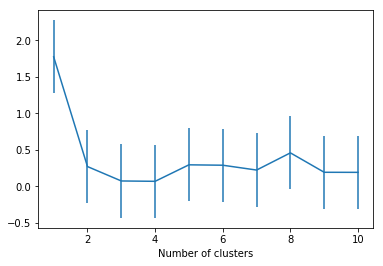

In [232]:
#your code herefor i 
from __future__ import division
import numpy
import statistics
import numpy as np
import numpy.ma as ma
from itertools import zip_longest
import matplotlib.pyplot as plt


K=[1,2,3,4,5,6,7,8,9,10]
i=0
sse=[]

sse_mean_k=[]
for k in K:
    s=0
    sse=[]
    sse_mean=[]
    for i in range(0,50):
#         print('k=======',k)
        l=kmeans_clustering(data,k,max_iter = 100, tol = pow(10,-3) )
        sse.append(l[-2])
#     print('sse\n ',sse)
    s=statistics.mean(sse)
    
    sse_mean_k.append(s)
#     print('len',len(sse))
# print('sse_mean_i\n ',sse_mean_k)


 
plt.xlabel('Number of clusters')
plt.errorbar(K,sse_mean_k,yerr=statistics.stdev(sse_mean_k))


        
    
